In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
budget_df = pd.read_excel('annual_operating_budgets.xlsx')
budget_df['Annual Operating Budget (USD)'] = budget_df['Annual Operating Budget (USD)'] / 1e6

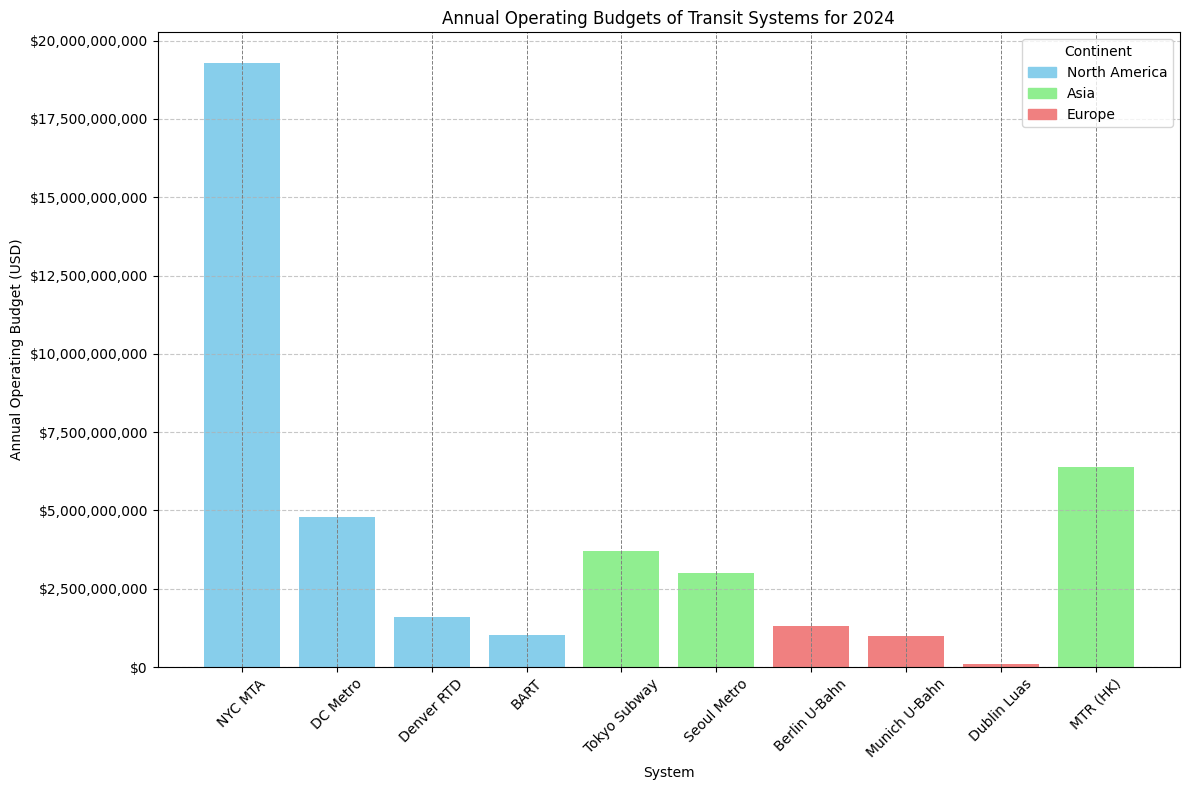

In [4]:
colors = {
    "North America": "skyblue",
    "Asia": "lightgreen",
    "Europe": "lightcoral"
}

continent_map = {
    'NYC MTA': 'North America',
    'DC Metro': 'North America',
    'Denver RTD': 'North America',
    'BART': 'North America',
    'Tokyo Subway': 'Asia',
    'Seoul Metro': 'Asia',
    'MTR (HK)': 'Asia',
    'Berlin U-Bahn': 'Europe',
    'Munich U-Bahn': 'Europe',
    'Dublin Luas': 'Europe'
}

budget_df['Continent'] = budget_df['System'].map(continent_map)
budget_df['Color'] = budget_df['Continent'].map(colors)

plt.figure(figsize=(12, 8))
bars = plt.bar(budget_df['System'], budget_df['Annual Operating Budget (USD)'] * 1e6, color=budget_df['Color'])
plt.ylabel('Annual Operating Budget (USD)')
plt.xlabel('System')
plt.title('Annual Operating Budgets of Transit Systems for 2024')
plt.xticks(rotation=45)

for i in range(len(bars)):
    plt.axvline(x=i, color='gray', linestyle='--', linewidth=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${int(x):,}'))

handles = [plt.Rectangle((0,0),1,1, color=colors[continent]) for continent in colors]
labels = colors.keys()
plt.legend(handles, labels, title='Continent')

plt.tight_layout()
plt.show()